In [19]:
import json

bias_data_path = '/media/global_data/fair_neural_compression_data/sep_fairness.json'
fid_data_path = '/media/global_data/fair_neural_compression_data/decoded_rfw/decoded_64x64/fid_data/demogpairs/fid.json'
with open(bias_data_path, 'r') as json_file:
    bias_data = json.load(json_file)
    
with open(fid_data_path, 'r') as json_file:
    fid_data = json.load(json_file)

In [21]:
data_path = '/media/global_data/fair_neural_compression_data/decoded_rfw/decoded_64x64'
bpp_data = {}
datasets = ['fairface']
for model_name in fid_data:
    if model_name == 'jpeg':
        continue
    print(f'model_name: {model_name}')
    bpp_data[model_name] = {}
    model_path = f'{data_path}/{model_name}'
    for dataset in datasets:
        print(f'dataset: {dataset}')
        bpp_data[model_name][dataset] = {}
        dataset_path = f'{model_path}/{dataset}'
        for quality in fid_data[model_name]:
            stats_path = f'{dataset_path}/{quality}/stats.json'
            with open(stats_path, 'r') as json_file:
                stats_data = json.load(json_file)
            if "results" in stats_data:
                bpp_data[model_name][dataset][quality] = stats_data['results']['bpp']
            elif "est_bpp" in stats_data:
                bpp_data[model_name][dataset][quality] = stats_data['est_bpp']
bpp_data

model_name: qres17m_lmb_64
dataset: fairface
model_name: mbt2018
dataset: fairface
model_name: hyperprior
dataset: fairface
model_name: cheng2020-attn
dataset: fairface
model_name: qarv
dataset: fairface


{'qres17m_lmb_64': {'fairface': {'1': 0.00886532558800188,
   '3': 0.02282370359182936,
   '6': 0.15795940315773765,
   '9': 0.404614933002803,
   '12': 0.7223974981481218}},
 'mbt2018': {'fairface': {'q_0001': 0.016809767051736497,
   'q_0009': 0.1548888608237158,
   'q_1': 0.22898081410871188,
   'q_2': 0.3578851009571441,
   'q_3': 0.5218644282039855}},
 'hyperprior': {'fairface': {'q_0001': 0.02389208837651166,
   'q_0009': 0.1269041086678334,
   'q_1': 0.21954348773464366,
   'q_2': 0.34495363053285133,
   'q_3': 0.5033693308406143}},
 'cheng2020-attn': {'fairface': {'q_0001': 0.015044328461066748,
   'q_0009': 0.13340453971414487,
   'q_1': 0.216410437588412,
   'q_2': 0.31665372603601366,
   'q_3': 0.44806759830559767}},
 'qarv': {'fairface': {'lmb_1': 0.1010826501389285,
   'lmb_4': 0.22999448835978642,
   'lmb_8': 0.33645152667242634,
   'lmb_16': 0.4547792137705401,
   'lmb_32': 0.5771540336173395}}}

In [22]:
bpp_data

all_bpps_list_fairface, all_bpps_list_celeba = [], []

for model_name in bpp_data:
    for dataset in bpp_data[model_name]:
        for _, bpp in bpp_data[model_name][dataset].items():
            if dataset == 'fairface':
                all_bpps_list_fairface.append(bpp)
            else:
                all_bpps_list_celeba.append(bpp)


In [35]:
fid_data['qres17m'] = fid_data.pop('qres17m_lmb_64')
bpp_data['qres17m'] = bpp_data.pop('qres17m_lmb_64')

In [25]:
bpp_data

all_bpps_list_fairface, all_bpps_list_celeba = [], []

for model_name in bpp_data:
    for dataset in bpp_data[model_name]:
        for _, bpp in bpp_data[model_name][dataset].items():
            if dataset == 'fairface':
                all_bpps_list_fairface.append(bpp)
            else:
                all_bpps_list_celeba.append(bpp)


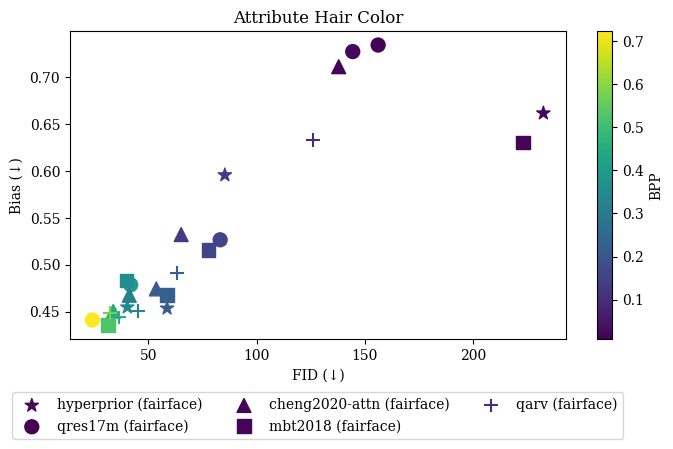

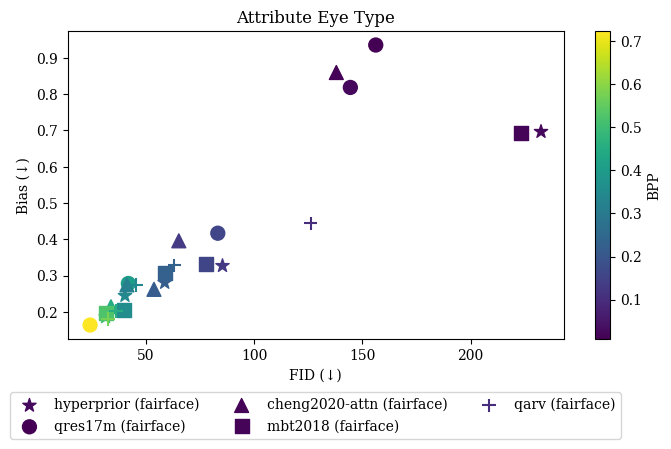

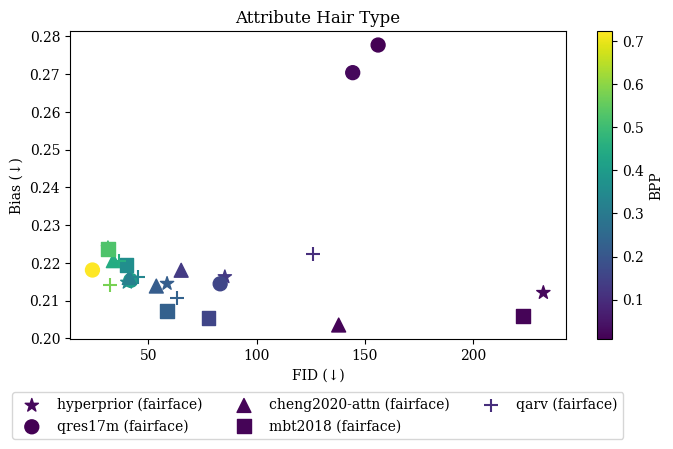

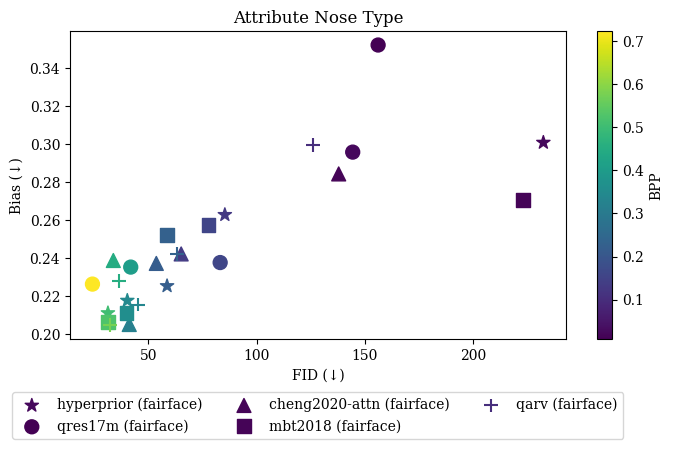

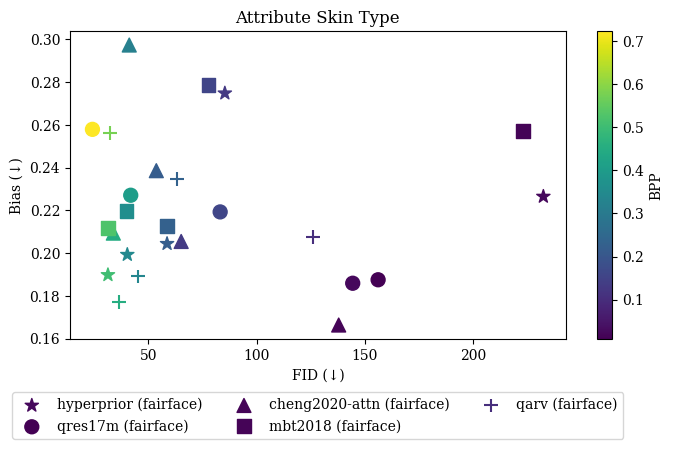

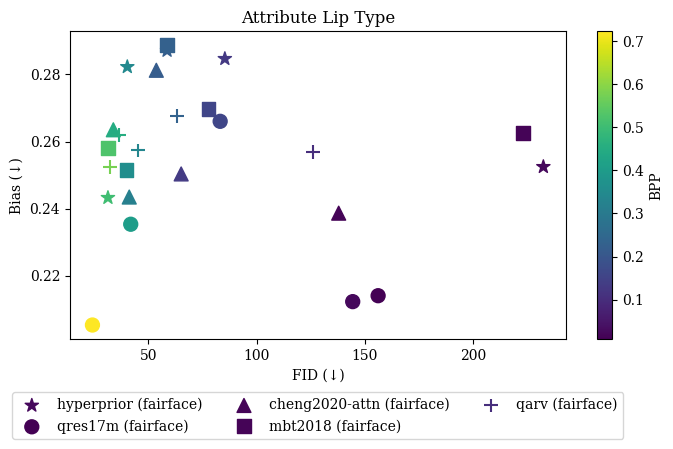

In [44]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib as mpl

# Set the font family globally
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Times New Roman'] + mpl.rcParams['font.serif']

model_markers = {
    'qres17m': 'o',
    'mbt2018': 's',
    'hyperprior': '*',
    'cheng2020-attn': '^',
    'qarv': '+'
}
# dataset_colors = {
#     'celebA': '#A52A2A',
#     'fairface': '#04D8B2'
# }
cmap = plt.get_cmap('viridis')

# Sample 4 colors from the colormap

# model_colors = {
#     'qres17m': colors[0],
#     'mbt2018': colors[1],
#     'hyperprior': colors[2],
#     'cheng2020-attn': colors[3]
# }

# dataset_makers = {
#     'celebA': '*',
#     'fairface': 's' 
# }

# bpp_scale = 300
attributes = ['hair_color', 'eye_type', 'hair_type', 'nose_type', 'skin_type', 'lip_type']

for attribute in attributes:
    fig, ax = plt.subplots(figsize=(8, 4))
    for model_name in bias_data:
        for dataset_name in ["fairface"]:
            bias = bias_data[model_name][dataset_name][attribute]
            bpps = list(bpp_data[model_name][dataset_name].values())
            norm = mcolors.Normalize(vmin=min(all_bpps_list_fairface), vmax=max(all_bpps_list_fairface))
            sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
            sm.set_array([])
            colors = sm.to_rgba(bpps)
            fids = list(fid_data[model_name].values())
            # sizes = np.array(bpps) * bpp_scale
            
            ax.scatter(fids, bias, s=100, c=colors, marker=model_markers[model_name], 
                        label=f'{model_name} ({dataset_name})')
    
    cbar = plt.colorbar(sm, ax=ax, label='BPP')
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

    ax.set_xlabel('FID (\u2193)')
    ax.set_ylabel('Bias (\u2193)')
    ax.set_title(f'Attribute {" ".join(attribute.split("_")).title()}')
    fig.savefig(f'../../plots/fid_vs_bias/{attribute}_plot.png', bbox_inches='tight')        